# How to use functions in unityvr.analysis?

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.signal
from scipy.stats import vonmises, skew, kurtosis
import json
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from unityvr.preproc import logproc as lp
from unityvr.viz import viz
from unityvr.analysis import posAnalysis, shapeAnalysis, fitting, utils

## Constructing unityvr data object from log file

Unity logs the experiment in a `.json` file (example provided in the sample folder). If the experiment is being done along with 2p imaging using ScanImage, refer to sample2pAnalysis.ipynb for alignment. There are two ways to close the loop in unity with fictrac: 
- `FictracSubject.cs`: relies on integrating rotation values supplied by fictrac to derive the animal's heading in unity
- `FictracSubjectIntegrated.cs`: while the other relies on using the integrated heading values from fictrac itself

Refer to [janelia-unity-toolkit](https://github.com/JaneliaSciComp/janelia-unity-toolkit/tree/master/org.janelia.collision-handling) for this. 

In [2]:
dirName = '../sample/fictracSubjectIntegrated'
fileName = 'Log_2024-10-30_15-51-02.json'
fileName

'Log_2024-10-30_15-51-02.json'

In [3]:
uvrTest = lp.constructUnityVRexperiment(dirName, fileName, fictracSubject='Integrated', posDfKey = 'worldPosition')
#if using FictracSubjectIntegrated, set fictracSubject='Integrated' and posDfKey = 'worldPosition'
#posDfKey specifies the string that will be matched to find the chunk in the json that contains position data. For FictracSubjectIntegrated this is expected to be 'worldPosition', while for FictracSubject it is expected to be 'attemptedTranslation'.
uvrTest.printMetadata()

correcting for Unity angle convention.
No analog input data was recorded.
No fictrac signal was recorded.
Metadata:

expid  :  testExp
experiment  :  test experiment
genotype  :  testGenotype
sex  :  NA
flyid  :  NA
trial  :  trial5-51-02
date  :  2024-10-30
time  :  15-51-02
ballRad  :  0.20000000298023224
setFrameRate  :  120
notes  :  NA
angle_convention  :  right-handed


# Trajectory Analysis

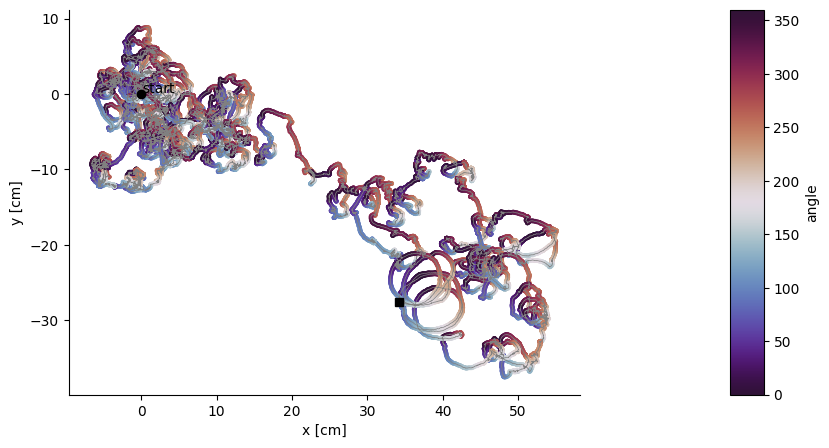

In [4]:
#use position function to generate position dataframe and plot trajecotory
#rotate_by parameter rotates the trajectory, in this example by 90 degrees
#the rotation gets updated in the metadata, 
#any subsequent rotation will modify the trajectory as well as the metadata
posDf = posAnalysis.position(uvrTest, 
                             derive = False, #derive set to true adds 
                             #derived parameters like velocity and angle to the dataframe
                             rotate_by=90, #in degrees if cylinder worlds have no offset applied: ensures that the darkest part of the world is at 0°
                             plot=True,
                             computeVel=True,
                             #pass the following parameters to save the dataframe in a chosen directory
                             #,plotsave=False,saveDir=saveDir         
                            )

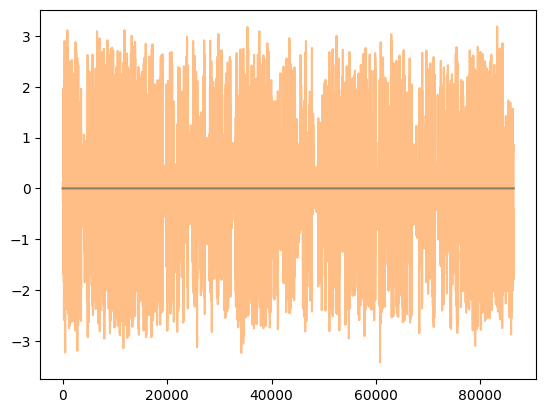

In [8]:
plt.plot(np.isnan(posDf['vR_filt']))
plt.plot(posDf['vR_filt'], alpha=0.5)

In [ ]:

plt.plot(np.isnan(posDf['vR_filt']))# The metadata is automatically extended:
uvrTest.printMetadata()
#IMPORTANT: this is because the uvrTest object is updated in place by the position function

Metadata:

expid  :  testExp
experiment  :  test experiment
genotype  :  testGenotype
sex  :  NA
flyid  :  NA
trial  :  trial5-51-02
date  :  2024-10-30
time  :  15-51-02
ballRad  :  0.20000000298023224
setFrameRate  :  120
notes  :  NA
angle_convention  :  right-handed
rotated_by  :  90
